In [34]:
!pip install tensorflow
!pip install keras

! pip install numpy scipy
!pip install seaborn

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential

In [163]:
dataset = pd.read_csv('pulsar_stars.csv', sep=",")

In [164]:
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [131]:
dataset.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [132]:
dataset.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [133]:
from sklearn import preprocessing


In [134]:
n_data = preprocessing.normalize(dataset)

In [135]:
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [136]:
np.array(n_data).tolist()

[[0.8281285862940171,
  0.3280628317161564,
  -0.0013819851795788451,
  -0.004122001520594851,
  0.018851919915810693,
  0.11258970450965841,
  0.046988107564309156,
  0.4374005070080715,
  0.0],
 [0.5865725797600101,
  0.3369384052898791,
  0.002662654322088335,
  -0.002947447967298291,
  0.009597641871063628,
  0.08503307014370318,
  0.06052101747736876,
  0.7289744928547196,
  0.0],
 [0.7972949247116323,
  0.30448679438964943,
  0.0025024171277882377,
  0.008135543169097901,
  0.024156983798168837,
  0.16829402368728658,
  0.05987180712665688,
  0.4889223602511515,
  0.0],
 [0.8590144104996332,
  0.35917448948939373,
  -0.00042975619693686145,
  -0.0039966210419289435,
  0.022883871203391585,
  0.13165867503766784,
  0.0433213304986107,
  0.3366561376742773,
  0.0],
 [0.32692822377200026,
  0.14986378414182017,
  0.0022139940328728095,
  0.004139697661432101,
  0.004343968744989077,
  0.04225846265335846,
  0.052578686372149006,
  0.9306275183158778,
  0.0],
 [0.5539904688610666,
  

In [137]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
for col in dataset.columns:
    if col!='target_class':
 
       dataset[col] = sc1.fit_transform(dataset[[col]])

In [138]:
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890,0
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0


In [139]:
corr=[[dataset.columns.values[x],  dataset.corr()["target_class"][x]] for x in range(dataset.shape[1])]
corr

[[' Mean of the integrated profile', -0.6731805813749446],
 [' Standard deviation of the integrated profile', -0.36370820870423204],
 [' Excess kurtosis of the integrated profile', 0.7915913821324954],
 [' Skewness of the integrated profile', 0.7095280231867442],
 [' Mean of the DM-SNR curve', 0.40087609259205687],
 [' Standard deviation of the DM-SNR curve', 0.4915350599791216],
 [' Excess kurtosis of the DM-SNR curve', -0.39081632359318763],
 [' Skewness of the DM-SNR curve', -0.25911669581633723],
 ['target_class', 1.0]]

In [140]:
corr.sort(key=lambda i: i[1])
corr

[[' Mean of the integrated profile', -0.6731805813749446],
 [' Excess kurtosis of the DM-SNR curve', -0.39081632359318763],
 [' Standard deviation of the integrated profile', -0.36370820870423204],
 [' Skewness of the DM-SNR curve', -0.25911669581633723],
 [' Mean of the DM-SNR curve', 0.40087609259205687],
 [' Standard deviation of the DM-SNR curve', 0.4915350599791216],
 [' Skewness of the integrated profile', 0.7095280231867442],
 [' Excess kurtosis of the integrated profile', 0.7915913821324954],
 ['target_class', 1.0]]

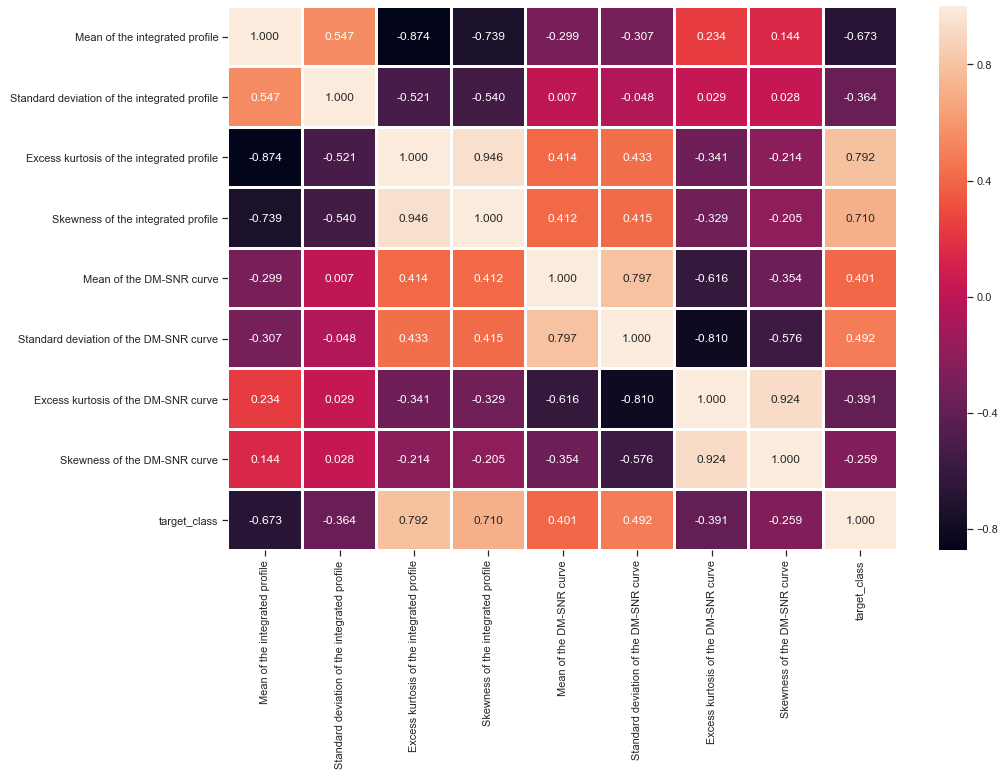

In [165]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr(),annot=True, fmt='.3f', linewidths=2)

In [166]:
data_0=dataset.loc[dataset['target_class']==0]

data_1=dataset.loc[dataset['target_class']==1]
data_1.head()

del_msk = np.random.rand(len(data_0)) < 0.85
data_0=data_0[~del_msk]

data=pd.concat([data_1,data_0])
#data.head()
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000
mean,91.790995,43.769689,1.406893,6.547481,25.686983,36.912234,6.363474,74.483008,0.405392
std,37.185620,8.152993,1.874450,11.636437,39.863833,24.368126,4.849172,99.146659,0.491028
min,5.812500,24.772042,-1.575234,-1.501641,0.312709,7.658623,-2.812353,-1.946039,0.000000
25%,65.210938,37.701965,0.145717,-0.016018,2.277592,16.023696,2.015568,3.046319,0.000000
50%,102.351562,44.425488,0.470490,0.801414,4.648829,26.237239,6.330096,42.991458,0.000000
75%,120.042969,49.601687,2.263729,7.875405,30.956940,58.568860,9.607337,110.144946,1.000000
max,180.859375,85.970901,8.069522,68.101622,206.529264,109.655345,30.883882,1017.383180,1.000000


In [167]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(data[['target_class']]))
encoded_categorical_columns.head()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [168]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1


In [169]:
msk = np.random.rand(len(data)) < 0.8

train=data[msk]
test=data[~msk]

del test['target_class']
del train['target_class']
y_train=encoded_categorical_columns[msk]
y_test=encoded_categorical_columns[~msk]


In [208]:
def create_model(init):
    model = keras.Sequential()
    model.add(keras.layers.Dense(20, input_shape=(train.shape[1],), kernel_initializer=init, activation='sigmoid'))
    model.add(keras.layers.Dense(20, kernel_initializer=init, activation='sigmoid'))
    model.add(keras.layers.Dense(20, kernel_initializer=init, activation='sigmoid'))
    model.add(keras.layers.Dense(2, kernel_initializer=init, activation='relu'))
    return model

In [209]:
uniform_model = create_model("uniform")
uniform_model.compile(
loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
uniform_model.fit(train, y_train,
batch_size=128, nb_epoch=350, verbose=2, validation_data=(test, y_test))

Train on 3230 samples, validate on 813 samples
Epoch 1/350
3230/3230 - 0s - loss: 1.1630 - accuracy: 0.5000 - val_loss: 0.8618 - val_accuracy: 0.5000
Epoch 2/350
3230/3230 - 0s - loss: 0.8182 - accuracy: 0.5000 - val_loss: 0.7363 - val_accuracy: 0.5000
Epoch 3/350
3230/3230 - 0s - loss: 0.7399 - accuracy: 0.5238 - val_loss: 0.6879 - val_accuracy: 0.6347
Epoch 4/350
3230/3230 - 0s - loss: 0.7078 - accuracy: 0.5845 - val_loss: 0.6681 - val_accuracy: 0.6347
Epoch 5/350
3230/3230 - 0s - loss: 0.6939 - accuracy: 0.5845 - val_loss: 0.6608 - val_accuracy: 0.6347
Epoch 6/350
3230/3230 - 0s - loss: 0.6868 - accuracy: 0.5845 - val_loss: 0.6584 - val_accuracy: 0.6347
Epoch 7/350
3230/3230 - 0s - loss: 0.6830 - accuracy: 0.5845 - val_loss: 0.6583 - val_accuracy: 0.6347
Epoch 8/350
3230/3230 - 0s - loss: 0.6803 - accuracy: 0.5845 - val_loss: 0.6576 - val_accuracy: 0.6347
Epoch 9/350
3230/3230 - 0s - loss: 0.6788 - accuracy: 0.5845 - val_loss: 0.6579 - val_accuracy: 0.6347
Epoch 10/350
3230/3230 - 0

Epoch 77/350
3230/3230 - 0s - loss: 0.1995 - accuracy: 0.9361 - val_loss: 0.1778 - val_accuracy: 0.9379
Epoch 78/350
3230/3230 - 0s - loss: 0.1999 - accuracy: 0.9351 - val_loss: 0.1776 - val_accuracy: 0.9416
Epoch 79/350
3230/3230 - 0s - loss: 0.1985 - accuracy: 0.9350 - val_loss: 0.1756 - val_accuracy: 0.9410
Epoch 80/350
3230/3230 - 0s - loss: 0.1973 - accuracy: 0.9345 - val_loss: 0.1757 - val_accuracy: 0.9416
Epoch 81/350
3230/3230 - 0s - loss: 0.1988 - accuracy: 0.9350 - val_loss: 0.1739 - val_accuracy: 0.9422
Epoch 82/350
3230/3230 - 0s - loss: 0.1949 - accuracy: 0.9359 - val_loss: 0.1754 - val_accuracy: 0.9410
Epoch 83/350
3230/3230 - 0s - loss: 0.1948 - accuracy: 0.9348 - val_loss: 0.1860 - val_accuracy: 0.9422
Epoch 84/350
3230/3230 - 0s - loss: 0.2077 - accuracy: 0.9348 - val_loss: 0.1804 - val_accuracy: 0.9422
Epoch 85/350
3230/3230 - 0s - loss: 0.1940 - accuracy: 0.9330 - val_loss: 0.1866 - val_accuracy: 0.9422
Epoch 86/350
3230/3230 - 0s - loss: 0.1996 - accuracy: 0.9353 - 

Epoch 156/350
3230/3230 - 0s - loss: 0.1830 - accuracy: 0.9375 - val_loss: 0.2056 - val_accuracy: 0.9440
Epoch 157/350
3230/3230 - 0s - loss: 0.1953 - accuracy: 0.9373 - val_loss: 0.2064 - val_accuracy: 0.9446
Epoch 158/350
3230/3230 - 0s - loss: 0.1829 - accuracy: 0.9393 - val_loss: 0.1915 - val_accuracy: 0.9446
Epoch 159/350
3230/3230 - 0s - loss: 0.1826 - accuracy: 0.9390 - val_loss: 0.1807 - val_accuracy: 0.9422
Epoch 160/350
3230/3230 - 0s - loss: 0.1804 - accuracy: 0.9382 - val_loss: 0.1879 - val_accuracy: 0.9440
Epoch 161/350
3230/3230 - 0s - loss: 0.1883 - accuracy: 0.9382 - val_loss: 0.2046 - val_accuracy: 0.9428
Epoch 162/350
3230/3230 - 0s - loss: 0.1816 - accuracy: 0.9372 - val_loss: 0.1854 - val_accuracy: 0.9446
Epoch 163/350
3230/3230 - 0s - loss: 0.1814 - accuracy: 0.9381 - val_loss: 0.1847 - val_accuracy: 0.9428
Epoch 164/350
3230/3230 - 0s - loss: 0.1849 - accuracy: 0.9381 - val_loss: 0.2005 - val_accuracy: 0.9440
Epoch 165/350
3230/3230 - 0s - loss: 0.1825 - accuracy:

KeyboardInterrupt: 